In [1]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

Macro `_latex_std_` created. To execute, type its name (without quotes).
=== Macro contents: ===
get_ipython().run_line_magic('run', 'Latex_macros.ipynb')
 

$
\newcommand{\margin}{{\mathbb{m}}}
\newcommand{\lmk}{\boldsymbol{\ell}}
$

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Common imports
import os

import svm_helper
%aimport svm_helper
svmh = svm_helper.SVM_Helper()

%matplotlib inline


# Why Support Vector Machines (SVM)

- Another model to solve the Classification task
- Model was derived from mathematical principles
    - formulated as a constrained optimization problem
- Has an interesting Cost function
    - two parts

Our claim throughout the course is that Cost functions are a key part of Machine Learning.

So while our "destination" is the SVM we will mainly focus on the "interesting sights" on the journey
- the Hinge Loss Cost function
- Gradient Descent, as a means of solving optimization problems

# SVM: high level intro and terminology

We will start with an intuitive (less mathematical) formulation of the SVM algorithm.

Along the way, we introduce terminology to facilitate the discussion.

Just as we did for Regression (MSE cost) and Classification (Cross Entropy cost):
- we will motivate the SVM Cost as a "good idea"
  
- we will circle back and mathematically justify the SVM Cost
  - for MSE and Cross Entropy: derived Cost function on the basis of Maximum Likelihood
  - for SVM: will derive it as the objective of an optimization problem
          -

## Linear separation for Classification

The basis of many models that we have encountered thus far are linear combinations of features
$\Theta^T \x$.

This linear combination defines a hyperplane that partitions the $n$ dimensional feature space.

It turns out that this can be the basis for a binary classifier
- points above/below the hyperplane as classified as Positive/Negative (or vice-versa)
$$
\begin{array}[lll]\\
\Theta^T \x \ge    0 & \text{predict Positive} \\
\Theta^T \x \lt    0  & \text{predict Negative} \\
\end{array}
$$

(Logistic Regression starts with a linear combination of features to predict the log odds).

**TO DO** Picture

If there is a $\Theta$ that creates a linear separation of our data, we will say that the
data is Linearly Separable.

What do we do if our data is *not* Linearly Separable ?

Transform it !
- Just like we added a polynomial feature to make our curvy data linear.
- Just like we transformed the target of Logistic Regression fromb probability to log odds

In our introduction, we will start by assuming the data has already been made Linearly Separable.

We will come back and show a class of transformations that help make this possible

**Note**

In our derivation the design matrix $\X$ has been augmented with a column of $1$'s 
- representing the intercept
- so that $\x^\ip_0 = 1$.

When we do this $\Theta_0$ becomes the intercept.

Geron changes notation from previous chapeters (in the "Under the Hood" subsection, page 204)
and *specifically* separates the intercept term.

Instead he denotes the intercept by $b$ and writes the hyperplane equation as
$$
\Theta^T \x + b
$$

We will maintain the convention of using $\Theta_0$ as the intercept (and $\x^\ip_0 = 1$).

## Margin Classification

If the data is Linearly Separable, how do we choose a hyperplane to separate it ?
- it is not unique
- among the choices, which is best ?


**TO DO** Pictures
- two different hyper planes
- margin
    - buffer zone
    - same accuracy, different margin

Our goal is not just to find a hyperplane (*separating hyperplane*) but
- to also find two, parallel hyperplanes (*boundary hyperplanes*)
- that are as far apart as possible
    - The *margin* is the distance from the separating hyperplane to the boundaries
    - The *buffer zone* is the area between the boundaries
- in which all Positive and Negative examples are on opposing sides of the boundaries
- there are no examples in the buffer zone

 With a margin of $\margin$, our predictions become
$$
\begin{array}[lll]\\
\Theta^T \x \ge    \margin & \text{predict Positive} \\
\Theta^T \x \lt   -\margin & \text{predict Negative} \\
\end{array}
$$

 ### Large Margin Classification
The idea behind a wide buffer zone is to improve generalization
- we don't want any training example to come "too close" to a boundary
- if it does, a similar test example may fall on the "wrong side" of the boundary

This is called *Large Margin Classification*.

### Hard and Soft Margins

There may be datasets that can't be made perfectly Linearly Separable
- a handful of "outlier" points

**TO DO** Picture

If we loosen our objectives, we might be able to approximately fit more datasets
- allow *margin violations*
    - training examples that are either
    - on wrong side of the boundary
    - are in the buffer zone
    
*Hard Margin* classification **disallows** margin violations

*Soft Margin* classification **allows but penalizes** margin violations (by imposing a Cost)

Our derivation of the SVM Cost function is obtained by assuming Hard Margins.

Soft Margins can be accomodated by adding a "slack" variable to each constraint.

### Support Vector Classifier (SVC),  Support Vector Machine (SVM)

What we have described thus far is a *Support Vector Classifier*.

If we add a preliminary set of transformations to induce Linear Separability, the process
if called a *Support Vector Machine*


## SVM Cost function

Now that we have defined our goals we follow the usual process for Machine Learning
- define a Cost/Loss function that mimics our goals
    - come back later to mathematically justify this function

    
The SVM Cost function will be the sum of two parts, each capturing an objective
- *Classification Loss*
    - a penalty for Margin Violations
        - misclassified example
        - correctly classified example, but example is in the buffer zone
- *Margin Penalty*
    - a penalty for small margins

By minimizing the SVM Cost we achieve
- high accuracy
- wide margins

### Margin Penalty

Our prediction function compares $\Theta^T \x$ to margin $\margin$.

What would happen if we divided both sides of the inequality by $\margin$ ?
- the inequalities involve a new margin of exactly $1$
- $\Theta$ would be rescaled by a factor of $\frac{1}{\margin}$
- Our prediction becomes
$$
\begin{array}[lll]\\
\Theta^T \x \ge    1 & \text{predict Positive} \\
\Theta^T \x \le   -1 & \text{predict Negative} \\
\end{array}
$$

Forcing $\margin = 1$ changes the large margin goal to one
of making the elements of $\Theta$'s small.

So our Margin Penalty looks like an L2 Regularization term

$$
\frac{1}{2} \Theta^T \cdot \Theta
$$

The mysterious $\frac{1}{2}$
- doesn't really affect the overall cost in a significant way
- will be useful in the mathematical derivations
    - Hint: 
        - $\frac{\partial \Theta^2}{\partial \Theta} = 2 \Theta$
        - the $\frac{1}{2}$ makes the derivative of the Margin Penalty with respect to $\Theta$  exactly $\Theta$
        - the derivative will be used in the optimization of SVM Cost

### Classification Loss: Hard Margin

Recall the separate prediction functions for Positive and Negative examples.

$$
\begin{array}[lll]\\
\Theta^T \x \ge    1 & \text{predict Positive} \\
\Theta^T \x \le   -1 & \text{predict Negative} \\
\end{array}
$$

We could write our Classification Loss in a manner analagous to the Cross Entropy Loss,
with two terms, one each for the Positive and Negative sides.

For compactness of writing, let
$$
s(\x) = \Theta^T \x -1
$$

Then the Classification Loss is
$$
\loss^\ip = \left( \y^\ip \max{} (0, - s(\x^\ip))  + (1 - \y^\ip) \max{}(0, s(\x^\ip)) \right)
$$

Let's analyze 
$$
\loss^\ip = \left( \y^\ip \max{} (0, - s(\x^\ip))  + (1 - \y^\ip) \max{}(0, s(\x^\ip)) \right)
$$
in detail

- if example $i$ is Positive ($\y^\ip = 1$)
    - if $\Theta^T \x^\ip \ge 1$
        - there is **no** margin violation caused by $\x^\ip$
        - then $s(\x^\ip) \ge 0$
        - $\max{} (0, - s(\x^\ip)) = 0$ and example $i$ contributes $0$ to Margin Loss
        
    - if $\Theta^T \x^\ip \lt 1$ 
        - there **is** a margin violation caused by $\x^\ip$
        - then $s(\x^\ip) < 0$
        - example $i$ contributes a positive amount $\max{} (0, - s(\x^\ip)) > 0$ to margin loss
    - there is **no** margin violation caused by $\x^\ip$

- if example $i$ is Negative $\y^\ip = 0$, an analagous argument holds

**Aside**

Note the similarity in form to Cross Entropy Loss,
$$
\loss^\ip = - \left( \y^\ip \log(\hat{p}) + (1-\y^\ip) \log(1-\hat{p})  \right)
$$

In both the Positive and Negative example case, the loss is minimized when the $\max{}$ is $0$
- large positive scores for positive examples
- large negative scores for negative examples

Rather than having the asymmetry in the two halves of our classification loss it is more convenient
to have the binary decision be represented by $\{-1, +1 \}$ rather than $\{0,1\}$.

Let $t^\ip$ be
$$t^\ip =
\begin{cases}
+1 \text{ if } \y^\ip = 1 \\
-1 \text{ if } \y^\ip = 0
\end{cases}
$$

so that our targets are now in the range $[-1,+1]$ rather than $[0,1]$.

Doing so makes the product $(t^\ip * s(\x^\ip))$ positive for correct predictions. 

So
the Classification Loss can be rewritten as
$$
\loss^\ip = \max{}(0, - 1 * t^\ip * s(\x^\ip))
$$


### Cost function

We have almost arrived at our final, average (over examples) SVM Cost function.

Do we want the two components (Margin Penalty and Classification Loss) to have
equal importance ?

It is typical to have a contant $C$ that expresses the relative weight of the two terms.

The final average SVM Cost function is the sum of the Margin Penalty and Classification Losses,
averaged over all $m$ examples

$$
\loss = \frac{1}{2} \Theta^T \cdot \Theta +  C * \frac{1}{m} * \sum_{i-1}^m { \max{}(0, - 1 * t^\ip * s(\x^\ip)) }
$$


### How do we determine $C$: Bias, variance tradeoff

What determines $C$ ?

If $C$ were infinite, we would tolerate **no** margin violations.
This is called a **hard** margin.

Hard margins are problematic in that
- some training sets may have no solution
- it encourages overfitting of training and poor generalization

A *soft* margin allows (but penalizes) margin violations, which may lead to better
generalization.

- if $C$ is high, relatively less importance is made to have elements of $\Theta$ become $0$
    - this can lead to overfitting
- if $C$ is low, more elements of $\Theta$ will be zero
    - this can lead to underfitting
 
So the choice of $C$ depends on the tradeoff between generalization and fitting the training set well.

In other words: the Bias/Variance Tradeoff we have encountered earlier in the course.


# Optimization preview: minimizing the Cost function

There are (at least) two ways to minimize the SVM Cost
- using a Quadratic Optimizer (since the first term is quadratic)
- using a method known as Gradient Descent

We will briefly mention Quadratic Programming in our discussions of
- the Kernel Trick
- an alternate derivation of SVM via landmark similarity

Gradient Descent will be introduced as a separate topic.


# SVM for Regression

SVM's can be used not only for Classification but for Regression as well.

For Classification, the cost function tries to fit all training examples *outside* the buffer zone.

For Regression, the cost function tries to fit all training examples *within* the buffer zone.



# Hinge Loss

Let's explore the Classification Loss more deeply.

$$
\loss^\ip = \left( \y^\ip \max{} (0, - s(\x^\ip))  + (1 - \y^\ip) \max{}(0, s(\x^\ip)) \right)
$$

You are familiar with the plot of the $\max{}({0, z})$ 
- constant zero for negative arguments $z$
- linear (and equal to $z$) for positive $z$

This resembles a *hinge* so the Classification Loss is refered to as a *Hinge Loss*

Lets' compare the plot of the Hinge Loss to the Cross Entropy Loss,
which has a similar form.

Here are the two sides of the Hinge Loss

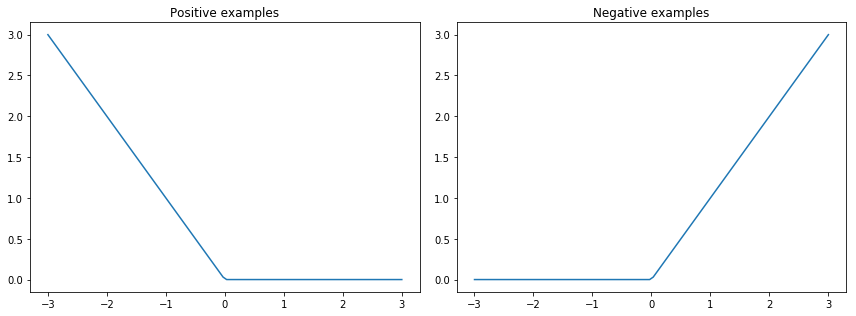

In [4]:
svmh.plot_hinges()

And here are the two sides of the Cross Entropy Loss

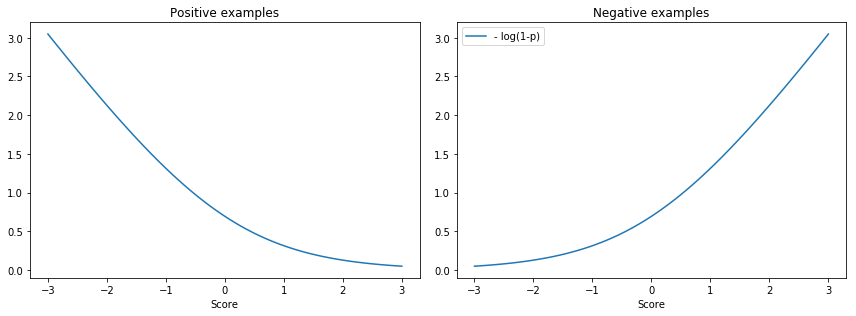

In [5]:
svmh.plot_log_p()

If we move the "hinge point" from $0$ to $-1, +1$ the similarity
between the SVM Classification Loss and Cross Entropy becomes more apparant

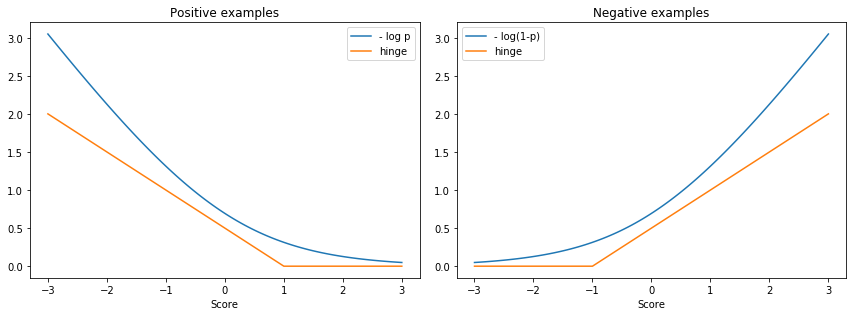

In [6]:
svmh.plot_log_p(hinge_pt=True)

Close, but different in an important way.

Consider the behavior of an optimizer that is minimizing the average (across all examples) loss

- Once the Hinge Loss for an example becomes 0 ($\loss^\ip = 0)$ 
    - the optimizer **does not need to reduce the loss further**
- In contrast, the Cross Entropy Loss **never** becomes $0$
    - so the optimizer continues to try to reduce it

For a Classfication task
- Cross Entropy Loss continues to try to improve the probability $\hat{p}^\ip$ long after $\hat{p}^\ip$ has crossed the prediction treshold (e.g., 0.5)
    - this might lead to overfitting (high variance)
- Hinge Loss will not try to improve prediction once we cross the threshold
    - this might lead to a fit that is "good" but not "best" (high bias)

The Hinge Loss (on a Regression task) imposes **no** cost for a training example as long as it is within the margin
- Recall: Regression tries to place points *within* the buffer zone, not outside
- Once the example is within the margin, there is no cost reduction in making a "better" fit.
    - fit does not need to be better than "good enough"


# Importance of normalization of $\x$

Imagine that the various components of $\x$ are on vastly different scales
- suppose $\x_1$ is in "billions of units" (so $\x_1$ is small) but $\x_2$ is in single units (large)

Then parameter $\Theta_1$ (which multiplies $\x_1$) will likely be much smaller than $\Theta_2$.

The Margin Penalty, which tries to reduce the value of elements of $\Theta$ will thus
be more likely to reduce $\Theta_2$ than $\Theta_1$ for no reason other than the disparate scales.

As we saw in our lecture on transformations, this is a danger with cost functions that
include a penalty for parameters magnitude.

The disparate scales of features in $\x$ can also affect some transformations.

For the Gaussian RBF, the 2-norm will be dominated by the larger dimension, almost to the exclusion of smaller dimensions.

Thus, if the chosen $\phi$ is sensitive to scale (such as the Gaussian RBF) it's important to normalize the training set (across each dimension of features) so that
all features (elements of $\x$) are on similar scale.

# SVM Drawbacks

## Complexity
The SVM may utilize up to $m$ landmarks from the vectors among the training set.

These landmarks are referred to as "support vectors".

As $m$ may be very large
- SVM models may consume a lot of memory (in the test phase, not just when being fit).

# SVM in `sklearn`

`sklearn` has several SVM algorithms (using different optimization techniques) that, mathematically,
should yield equivalent results.

The difference is that some optimize for time (faster solution) versus space (ability to handle bigger
training sets) versus being more general solvers.

According to Geron (page 194), the following should be equivalent
- `LinearSVC(C=1, loss="hinge")`
- `SVC(C=1,kernel="linear")`
- `SGDClassifier(loss="hinge", alpha=1/(m*C))`

# SVM Cost function derived from Constrained Optimization

Here is an alternate (and slightly more mathematical) derivation of the SVM Cost function.

Recall our dual objectives
- maximize margin (width of buffer zone)
- with **no** margin violations (no examples in buffer zone)

The natural way to express these objectives is as a Constrained Optimization problem
- maximize margin
- subject to not violating a boundary constraint (all examples on correct side of boundary)

We already showed
 how maximizing the margin was equivalent to minimizing
$$
\frac{1}{2} \Theta^T \cdot \Theta
$$

And we showed how the two boundary equations could be unified into a single equation
- replace the Positive/Negative labels  $\y^\ip \in \{0,1\}$ to $t^\ip \in \{ -1, +1\}$
 - $$t^\ip =
\begin{cases}
+1 \text{ if } \y^\ip = 1 \\
-1 \text{ if } \y^\ip = 0
\end{cases}
$$

So the constraints can be written as

$$
t^\ip * \Theta^T \x^\ip \ge 1 \text{for } i=1,\ldots,m
$$


The Constrained Minimization problem is thus

$$
\begin{array}[llll]\\
\text{minimize } \frac{1}{2} \Theta^T \Theta \\
\text{subject to } t^\ip * s(\hat\x^\ip) \ge 1 \text{for } i=1,\ldots,m
\end{array}
$$

## Solving Constrained Optimization: LaGrangian multipliers

It is beyond the scope of this course, but one way to solve constrained minimization
is to create an objective function $\loss$ that is the sum of
- the function to minimize
- $\lambda$ times each constraint (when it is rewritten in a form where the inequality is with respect to $0$)

The $\lambda$ terms are called *Lagrangian multipliers*.

They serve as penalties when a constraint is violated (i.e., is greater than $0$).

The (per example) objective function $\loss$ becomes
$$
 \frac{1}{2} \Theta^T \Theta + \lambda * ( \max{}(0, - 1 * t^\ip * s(\x^\ip)))
$$

which is equal to the SVM Cost function that we constructed in the ad hoc fashion
if we let $\lambda = C$.

Recall $C$ expressed the relative weight between the Margin Penalty and Classification Loss.


# Transformations to induce Linear Separability

Sometimes our models can't fit the data because some key feature is missing.

This was the case for our "curvy" data and Linear model: the polynomial term was missing.


Transformations to induce linearity are interesting because
- they make our data linear in the new dimensions (features)
- when mapped back to our original dimensions, they introduce non-linearity, which can be powerful

As we will see, non-linear decision boundaries are a key part of Deep Learning.

In Classical Machine Learning, these transformations serve a similar role.

Let's explore a classification problem.  
- The colors denote different classes.
- We won't name the $\x_1, \x_2$ features

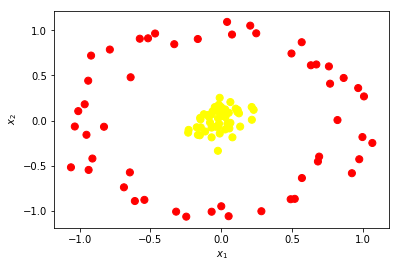

In [7]:
Xc, yc = svmh.make_circles(plot=True)

Doesn't appear to be linearly separable.

But, as we saw in the Transformation lecture, an RBF transformation does the trick:

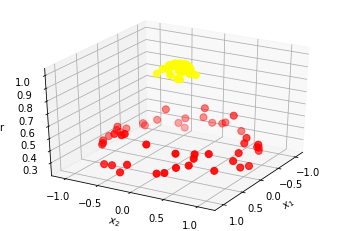

In [8]:
X_w_rbf = svmh.circles_rbf_transform(Xc)
_= svmh.plot_3D(X=X_w_rbf, y=yc )

Magic ! The new feature separates the two classes.
- just like the polynomial feature make the curvy data set linear

The particular transformation is called Radial Basis Function (RBF) Transformation.

Here's the code that created the new feature "r".

Simple.  

Basically, the transformation creates a scalar measure (*similarity function*) of the distance between
the existing features $\x^\ip$ of example $i$ and the features of a reference point.

In this case the reference point ("landmark") is the origin $(0,0)$ so
we don't write it explicitly.

In general the distance would be coded as
 `Xc - x_ref`
 
Examples that are very
close to the reference point have high values, and the values fall off sharply as the distance increases.


## Kernels and the Kernel Trick

There is a class of particularly useful transformations called *kernel functions*
or *similarity functions*.

In order to appreciate them we present, without proof, some properties of efficient solvers for
the SVM problem.

A common way to implement SVM algorithms is via
a solution to a Quadratic Programming problem.

Quadratic Programming problems can be reformulated into a twin problem called 
its *dual form*.  The dual form for the SVM problem is

**Geron Equation 5-6: Dual form of the linear SVM objective**

$
\begin{split}
\underset{\mathbf{\alpha}}{\operatorname{minimize}}
\dfrac{1}{2}\sum\limits_{i=1}^{m}{
  \sum\limits_{j=1}^{m}{
  \alpha^{(i)} \alpha^{(j)} t^{(i)} t^{(j)} {\mathbf{x}^{(i)}}^T \mathbf{x}^{(j)}
  }
} \quad - \quad \sum\limits_{i=1}^{m}{\alpha^{(i)}}\\
\text{subject to}\quad \alpha^{(i)} \ge 0 \quad \text{for }i = 1, 2, \dots, m
\end{split}
$

It is beyond the scope of this course to explain the equation.

The key thing to observe is the dot product $\x^\ip \cdot \x^{(i')}$ within the double summation.

(Note, we change the superscripts to $i$ and $i'$ and the multiplication of the transpose to the dot product).

Consider a transformation $\phi(\x)$ that is applied to all examples.

Then the above dot product becomes 
$$\phi(\x^\ip) \cdot \phi(\x^{(i')})$$

Note that some transformations may add dimensions 
- so that $\x$ goes from $n$ features
to $\phi(\x)$ with $n' \gg n$ features.

A function $K$ is called a *kernel function* (sometimes called *similarity function*) if

$$
K(\x^\ip, \x^{(i')}) = \phi(\x^\ip) \cdot \phi(\x^{(i')})
$$

That is: it is a function that can be rewritten as a dot product of transformed arguments.

In order for a function to be a Kernel Function, it must satisfy Mercer's Theorem.

To make this concrete: 
- consider the similarity function $K$ that 
compares two examples with
a second order polynomial transformation
$$
K(\x^\ip, \x^{(i')}) = (\x^\ip \cdot \x^{(i')})^2
$$

Geron equations 5-8 and 5-9 show the transformation $\phi$ that proves that $K$ is a kernel function
for the case where the length of $\x$ is 2:

**Equation 5-8: Second-degree polynomial mapping**

$
\phi\left(\mathbf{x}\right) = \phi\left( \begin{pmatrix}
  x_1 \\
  x_2
\end{pmatrix} \right) = \begin{pmatrix}
  {x_1}^2 \\
  \sqrt{2} \, x_1 x_2 \\
  {x_2}^2
\end{pmatrix}
$

**Equation 5-9: Kernel trick for a $2^{nd}$-degree polynomial mapping**

$$
\begin{array}[llll]\\
\phi(\mathbf{a})^T \phi(\mathbf{b})  & = & 
\begin{pmatrix}
  {a_1}^2 \\
  \sqrt{2} \, a_1 a_2 \\
  {a_2}^2
  \end{pmatrix}^T \begin{pmatrix}
  {b_1}^2 \\
  \sqrt{2} \, b_1 b_2 \\
  {b_2}^2
\end{pmatrix} \\
& = & {a_1}^2 {b_1}^2 + 2 a_1 b_1 a_2 b_2 + {a_2}^2 {b_2}^2 \\
&  = & \left( a_1 b_1 + a_2 b_2 \right)^2 \\
&  = & \left( \begin{pmatrix}
  a_1 \\
  a_2
\end{pmatrix}^T \begin{pmatrix}
    b_1 \\
    b_2
  \end{pmatrix} \right)^2 \\
& = & (\mathbf{a}^T \mathbf{b})^2
\end{array}  
$$

What this means is
- $K(\x^\ip, \x^{(i')})  =  (\mathbf{a}^T \mathbf{b})^2$ is a Kernel function for transformation $\phi$
    - because it is equivalent to the dot product of its transformed arguments
- it **is not necessary to compute** $\phi(\x^\ip)$ or $\phi(\x^{(i')})$
- we can simply replace $\phi(\x^\ip) \cdot \phi(\x^{(i')})$ in the dual form
    - with shortcut $K(\x^\ip, \x^{(i')}) =  (\mathbf{a}^T \mathbf{b})^2$ 
    
Some transformations are expensive (the Radial Basis Transformation is infinite dimensional).

So a kernel function achieves the benefit (transforming for linear separability)
without the cost.


## Some Kernels/Similarity functions
[kernels](http://crsouza.com/2010/03/17/kernel-functions-for-machine-learning-applications/#linear)

There are a number of common similarity functions.
We investigate just a handful:

### Linear

The linear similarity

$$
K(\x, \x^{(i')}) = \x^T \cdot \x^{(i')} + c
$$

$\phi$ is the identity transformation $\phi(\x) = \x$.

The linear kernel results in something very close to plain logistic regression.

### Gaussian

The Gaussian Radial Basis Function (RBF)

$$
K(\x, \x^{(i')}) =  \exp( - \frac{1}{2 \sigma^2} * \mid\mid  \x - \x^{(i')} \mid\mid^2 )
$$


The form of this function is that of a Gaussian distribution with mean $0$ and standard deviation $\sigma$.

The similarity is maximized when $\x$ and  $\x^{(i')}$ are close
in Euclidean space (due to the 2-norm $\mid\mid \; \mid\mid^2$)

When $\sigma$ is small, there is a sharp drop-off from the maximium at $\x^{(i')}$ to near-by points.

Conversely, when $\sigma$ is large, the drop-off is much smoother.


## When to use kernels

The choice of the complexity of a kernel depends on the relationship
between $m$, the number of training examples, and $n$, the number of features.

- When $m$ is large (and large relative to $n, m \gg n$) there is a lot of data on which to fit a complicated kernel.
    - however, when $m$ is really large, this can be expensive
- When $m$ is small, the lack of data for fitting suggests a simple, linear kernel or logistic regression
- when $n$ is small, simpler Kernels are Logistic Regression is suggested

# Support Vector Machines: derivation via landmark similarity

We now show another derivation of the Support Vector Machine.

The SVM will apply a particular kind of transformation $\phi$ to $\x$ before fitting a linear model.

## Landmarks and the Similarity transformation

Let us pick a set of distinguished points $\{ \lmk^{(1)}, \lmk^{(2)}, \ldots \}$ in the input domain.

We will refer to these distinguished points as "landmarks" because we will use
them as reference points from which we will measure the similarity (inverse of distance) of each example $\x^\ip$ in the training set.

In particular, let us choose $n'$ landmarks and let
$$
K(\x, \lmk^\ip)
$$
be a measure of similarity between vector $\x$ and the $i^{th}$ landmark.

$K$ will be referred to as a "similarity function" or "kernel".

Then the transformation of $\x^\ip$ into
$$
\hat\x^\ip = [ K(\x^\ip, \lmk^{(1)}), K(\x^\ip, \lmk^{(2)}), \ldots, K(\x^\ip, \lmk^{(n')}),]
$$
is a representation of the original $\x^\ip$ into a "similarity" vector.

The transformed features $\hat{x}^\ip$ is of length $n'$, each element
representing the distance of $\x^\ip$ to one landmark.

We will do linear classification on these transformed features $\hat\x$ rather than the original $\x$.

The linear classifier creates a hyperplane to separate Positive and Negative examples
by using the dot product to create a score 
$$s(\hat{\x}^\ip) = \Theta^T \cdot  \hat{\x}^\ip$$
based on transformed $\hat{x}^\ip$

This score will determine the prediction.

Score:
$$
s(\hat{\x}^\ip) = \Theta^T \cdot \hat{\x}^\ip + b
$$

Score to prediction:
$$
\hat{\y}^\ip = 
\begin{cases}
0 & \text{if } s(\hat{\x}^\ip) < 0 \\
1 & \text{if } s(\hat{\x}^\ip) \ge 0
\end{cases}
$$


**Note** 

- $\Theta$ and $\hat{\x}$ must have the same length
- The $\Theta$ in this derivation is thus **very different** than the $\Theta$ in the original derivation
    - in this derivation the length of $\Theta$ is $m$ (number of examples) **not** $n$ (number of original features)
    - the elements of this $\Theta$ correspond to *landmarks* **not** features in the original dimensions

So once again, the dot product is doing a form of "pattern matching" of features,
but now 
- we use transformed features: similarity to landmarks
- the pattern is identifying the relative importance of being similar to each landmark

So far, very similar to Logistic Regression: the score determines the prediction.

One difference is that Logistic Regression converts score to  probability
via a sigmoid function:
$$
\hat{p}^\ip = \sigma( s(\x^\ip))
$$
This probability is needed mainly for the Cost function for Logistic Regression (Binary Cross Entropy)
but may be useful as an informative output as well.

We shall soon seen the main difference from Logistic Regression: Hinge Loss
rather than Cross Entropy

## Choosing the landmarks

**TO DO** Picture

How do we choose the landmarks ?  How many do we choose ?

Let's choose each of the $m$ examples in the training set as a landmark so
that
$\lmk^\ip = \x^\ip$.

This might initially seem to be a large number of landmarks.  

Is it possible to choose fewer ?

Yes, and we will let Machine Learning decide which ones matter!

## Cost function

Just like with Logistic Regression, a critical part of the cost function
is a constraint that our predictions are accurate.

For Logistic Regression, we converted the linear score into a probability via the logistic function

$$ \hat{p}^\ip  = \sigma(s(\hat\x^\ip))$$

and used Binary Cross Entropy Loss for each example $i$ (and then sum across examples for total loss:
$$
\loss^\ip = - \left( \y^\ip \log(\hat{p}) + (1-\y^\ip) \log(1-\hat{p})  \right)
$$

In contrast, SVM will use cost function (Hinge Loss) that is similar in form to
Binary Cross entropy.

$$
\loss^\ip = \left( \y^\ip \max{} (0, - s(\hat\x))  + (1 - \y^\ip) \max{}(0, s(\hat\x)) \right)
$$

This cost function was chosen such that it can be minimized very quickly via specialized constrained optimizers.  

SGD would still work, but would be move slower.

We refer to this loss as the *classification loss*.

### Regularization penalty

The purpose of the classification loss is to enforce correct prediction.

We add one more constraint to the cost function: 
- an L2 regularization penalty on the weights $\Theta$.

One reason for this constraint is that it
- forces some $\Theta_i$ to $0$
- which means landmark $\lmk^\ip$ is not necessary 
- and we wind up with $m' < m$ landmarks

Once we discuss adding a margin to the hinge loss, we will see a second purpose.

So the final (per example) cost  function is a classification error plus a regularization penalty:
$$
    \loss^\ip =  - \max{}(0, t^\ip * s(\hat\x^\ip) ) + \lambda * \frac{1}{2} \Theta^T \cdot \Theta
$$
where $\lambda$ is multiplier for the strength of the regularization penalty $\frac{1}{2} \Theta^T \cdot \Theta$.

**Asides**

- Write penalty with the $\frac{1}{2}$ in front so that the derivative with respect to $\w$ is $\w$.
- The Regularization Penalty is the same as the Margin Penalty of our prior derivation
- The relative weight between Classification Loss and the Regularization Penalty is $\lambda$
    - The Regularization Penalty is $\lambda$ times more important than Classification Loss
    - Prior derivation: Classification Loss was $C$ times as important as Regularization Penalty
    - so $C = \frac{1}{\lambda}$

As we discussed in our original derivation
- we can always use a margin value of $1$ rather
than an arbitrary $\margin$
as this will only result in a rescaling of values in $\Theta$ by $\margin$

So the cost becomes
$$
    \loss^\ip =  - \max{}(0, t^\ip * s(\hat\x^\ip) - 1) + \lambda * \frac{1}{2} \Theta^T \cdot \Theta
$$

Thus our goal is no longer to just make $t^\ip * s(\hat\x^\ip)$ positive, but to
make it greater than the hinge value of $1$.

## The landmarks are chosen by the regularizer !

Now that we have the complete cost function we see something interesting
- the regularizer tries to force $\Theta_j$ to zero for some $j$
- this corresponds to eliminating landmard $\lmk^{(j)}$

So the Regularization Penalty automatically choses which of the $m$ elements of the training set
to keep as landmarks.

# SVM and Gradient Descent preview

Gradient Descent is a way of finding the parameters (e.g, $\Theta$) that minimize
a given cost Function.

The Cost Functions given for SVMs are amenable to this solution
- but are solved more rapidly with Quadratic Programming

The advantage of Gradient Descent is its ability to handle complex Cost Functions.

In the SVM context:
- consider the transformation using the Radial Basis Function (RBF)
- the RBF takes a parameter $\sigma$

So $\sigma$ is a hyperparameter of the SVM problem.

Hyperparameters (e.g., strength of regularization penalties) were previously handled
by post hoc search.

With Gradient Descent
- $\sigma$ becomes just one more parameter in the Cost Function
- solve for it simultaneously with $\Theta$.

In [9]:
print("Done")

Done
